In [25]:
# Importing the library 'pandas' for the machine learning
import pandas as pd

# Importing the data from the csv file onto the 'df' dataframe
df = pd.read_csv('./wdbc.csv',header=None)

In [26]:
# Checking the shape of the dataset
print(df.shape)

(569, 32)


In [27]:
# Removing the column with ID Number since it's irrelevant to our classifier
df.drop(df.columns[0], axis=1, inplace=True)

In [28]:
# Confirming removal of ID Number
print(df.shape)

(569, 31)


In [29]:
# Splitting the output variable and the training features
y = df.iloc[:,0]
df.drop(df.columns[0], axis=1, inplace=True)

In [31]:
# Data Visualization
print(df.describe())

               2           3           4            5           6   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               7           8           9           10          11  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   

In [17]:
# Importing the normalizer and the column transformer for the data preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

# Column Transformer is coded to normalize the columns that are of high values i.e out of the range of 0-10
ct = ColumnTransformer([("normalization", Normalizer(norm='l1'), [2,3,4,5,15,23,24,25])], remainder='passthrough')

# The columns are fitted and transformed for normalization
df = ct.fit_transform(df)

In [18]:
# Encoding the output variable to numeric class labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'B': 0, 'M': 1}


In [19]:
# Splitting the model in 70-30 scheme for training
from sklearn.model_selection import train_test_split

# The overall dataset is splitted into two sets of training and testing randomly
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=6, stratify=y)

Number of mislabeled points out of a total 171 points : 4
Confusion matrix


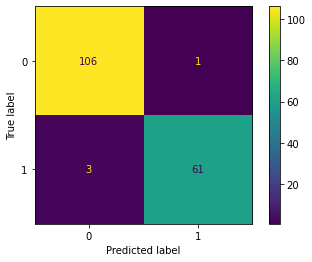

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# GaussianNB is the Naive Bayese implementation in sklearn library
# ConfusionMatrixDisplay and confusion_matrix gives us the confusion matrix

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(cm).plot()


Accuracy : 0.9766081871345029
Specificity : 0.9906542056074766
Sensitivity : 0.953125
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       107
   Malignant       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



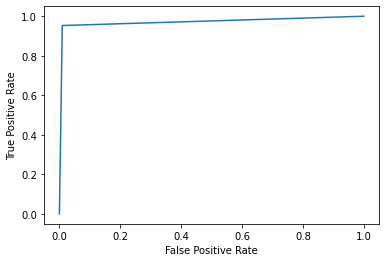

In [21]:
# Final metrics 
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay, classification_report

print("Accuracy :", accuracy_score(y_test, y_pred))

tn, fp, fn, tp = cm.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

print(classification_report(y_test, y_pred, target_names = ['Benign', 'Malignant']))

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()